## 目的
年、月ごとに集計する

### ポイント
値がない年や月は0で埋める


## ライブラリのインストール

```
pip install pandas
pip install numpy
```


## 参考資料

集計用の関数
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Grouper.html

集計範囲を決める
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

Plot

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html



In [71]:
%matplotlib inline
import pandas as pd
import datetime
import numpy as np

df = pd.DataFrame(data={
    'value': [
        1,1,1
    ]
    },
    index=[
        datetime.datetime(2016,1,1),
        datetime.datetime(2017,1,1),
        datetime.datetime(2017,2,1),
    ]
)
df

,value
2016-01-01,1
2017-01-01,1
2017-02-01,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2016-01-01 to 2017-02-01
Data columns (total 1 columns):
value    3 non-null int64
dtypes: int64(1)
memory usage: 48.0 bytes


# 月別に集計する

In [4]:
# Tips
# TimeGrouperを使うためには、IndexがDatetimeIndexになっていなければなりません。

# freq
# # http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
df2 = df.groupby(pd.TimeGrouper(freq='M')).sum(fill_value=0)
df2

,value
2016-01-31,1
2016-02-29,0
2016-03-31,0
2016-04-30,0
2016-05-31,0
2016-06-30,0
2016-07-31,0
2016-08-31,0
2016-09-30,0
2016-10-31,0


In [5]:
idx = pd.date_range('01-01-2017','12-31-2017',freq='M').to_period('m')
idx

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]', freq='M')

In [25]:
# 2017年に絞る
df2 = df[df.index >= '2017'].to_period('m')
df2

,value
2017-01,1
2017-02,1


In [39]:
df2 = df2.reindex(idx, fill_value=0)
df2

,value
2017-01,1
2017-02,1
2017-03,0
2017-04,0
2017-05,0
2017-06,0
2017-07,0
2017-08,0
2017-09,0
2017-10,0


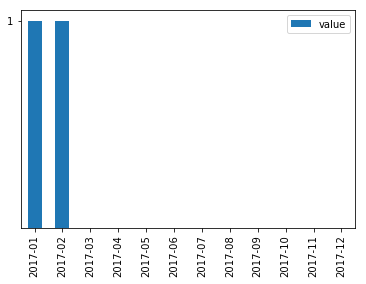

In [54]:
df2.plot(kind='bar', yticks=[1])

# 年ごとに集計する

In [31]:
# freq='A'で年ごとに集計する
df3 = df.groupby(pd.TimeGrouper(freq='A')).sum(fill_value=0)
df3 = df3.rename(index= lambda x: x.year)
df3

,value
2016,1
2017,2


In [33]:
# 2016年〜2018年
years = np.arange(2016,2019,1)
years

array([2016, 2017, 2018])

In [37]:
df3 = df3.reindex(years, fill_value=0)
df3

,value
2016,1
2017,2
2018,0


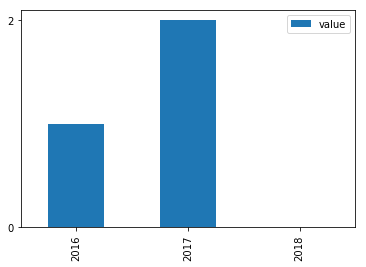

In [67]:
df3.plot(kind='bar', yticks=[df3.value.min(), df3.value.max()])

In [66]:
df3.value.min()

0